In [1]:
# Deoebdencies
import pandas as pd
import requests
import json
from config import api_key
from pprint import pprint
from pathlib import Path
import matplotlib.pyplot as plt
import os

# read excel
df = pd.read_excel('Resources/mtcs-hotel-performance-en-2022.xlsx')
new_df = df.dropna(how ='all').dropna(how='all', axis = 1)
new_df.reset_index(drop = True, inplace=True)

columns_to_keep = [0,1,4,7]
new_df = new_df.iloc[ :, columns_to_keep]
# new_df.keys()

new_columns = {
    'Unnamed: 1' : 'Area',
     'Unnamed: 2' : '2022 Occupancy Percentage',
     'Unnamed: 6' : '2022 Average Daily Rate',
     'Unnamed: 10': '2022 Revenue Per Available Room'
 }

new_df.rename(columns = new_columns, inplace = True)
new_df = new_df.iloc[3:-2:]
new_df.reset_index(drop = True, inplace=True)

new_2022_df = new_df
new_2022_df


,Area,2022 Occupancy Percentage,2022 Average Daily Rate,2022 Revenue Per Available Room
0,ONTARIO,0.540639,172.391794,93.201771
1,Greater Toronto Area,0.617517,190.468957,117.617818
2,Downtown Toronto,0.598028,258.379959,154.51856
3,Toronto Airport,0.703058,169.046913,118.8497
4,GTA West,0.599947,147.401199,88.432875
5,GTA East/North,0.606979,147.123762,89.300974
6,Eastern Ontario,0.489435,132.647051,64.922153
7,Kingston,0.426314,137.222976,58.500031
8,Other Eastern Ontario,0.515152,131.104226,67.538666
9,Ottawa,0.514319,173.658666,89.316009


In [4]:
#Create empty lists to store DataFames for each years
new_df_2022 =[]
new_df_2021 =[]
new_df_2020 =[]
new_df_2019 =[]
new_df_2018 =[]

year_list = ['2022','2021','2020','2019','2018']

# Extract Data by year 
for i in year_list:
    
    df = pd.read_excel('Resources/mtcs-hotel-performance-en-2022.xlsx', sheet_name = i )
    new_df = df.dropna(how ='all').dropna(how='all', axis = 1)
    new_df.reset_index(drop = True, inplace=True)

    columns_to_keep = [0,1,4,7]
    new_df = new_df.iloc[ :, columns_to_keep]
    new_columns = {
         'Unnamed: 1' : 'Area',
         'Unnamed: 2' : f'{i} Occupancy Percentage',
         'Unnamed: 6' : f'{i}Average Daily Rate',
         'Unnamed: 10': f'{i} Revenue Per Available Room'
     }

    new_df.rename(columns = new_columns, inplace = True)
    new_df = new_df.iloc[3:-2:]
    new_df.reset_index(drop = True, inplace=True)
    
#   append data by year
    if i == '2022':
        new_df_2022.append(new_df)
    elif i == '2021':
        new_df_2021.append(new_df)
    elif i == '2020':
        new_df_2020.append(new_df)
    elif i == '2019':
        new_df_2019.append(new_df)
    elif i == '2018':
        new_df_2018.append(new_df)

# Concatenate DataFrames within each year list
merged_df_2022 = pd.concat(new_df_2022, ignore_index=True)
merged_df_2021 = pd.concat(new_df_2021, ignore_index=True)
merged_df_2020 = pd.concat(new_df_2020, ignore_index=True)
merged_df_2019 = pd.concat(new_df_2019, ignore_index=True)
merged_df_2018 = pd.concat(new_df_2018, ignore_index=True)

# Merge the DataFrames for different years on the 'Area' column
merged_df = merged_df_2018.merge(merged_df_2019, on='Area')
merged_df = merged_df.merge(merged_df_2020, on='Area')
merged_df = merged_df.merge(merged_df_2021, on='Area')
merged_df = merged_df.merge(merged_df_2022, on='Area')

# pprint(merged_df)
# merged_df.to_excel('hotel_data.xlsx', index=False)
# merged_df
# Define the output file path
output_directory = "output/"
output_file_path = Path(output_directory) / 'hotel_data2.xlsx'
# Save the merged_df DataFrame to an Excel file without the index
merged_df.to_excel(output_file_path, index=False)
# merged_df['Area'].unique()

In [6]:
# create ccupancy Percentage data
occupancy_columns = [
    'Area',
    '2018 Occupancy Percentage',
    '2019 Occupancy Percentage',
    '2020 Occupancy Percentage',
    '2021 Occupancy Percentage',
    '2022 Occupancy Percentage'
]
occupancy_df = merged_df[occupancy_columns]
occupancy_df 

#output_file_path = Path(output_directory) / 'Occupancy_Percentage.xlsx'
# Save the merged_df DataFrame to an Excel file without the index
#occupancy_df.to_excel(output_file_path, index=False)

,Area,2018 Occupancy Percentage,2019 Occupancy Percentage,2020 Occupancy Percentage,2021 Occupancy Percentage,2022 Occupancy Percentage
0,ONTARIO,0.700264,0.687419,0.347813,0.440955,0.540639
1,Greater Toronto Area,0.761162,0.745009,0.318492,0.438171,0.617517
2,Downtown Toronto,0.783845,0.776009,0.219857,0.305946,0.598028
3,Toronto Airport,0.785729,0.775448,0.345863,0.489037,0.703058
4,GTA West,0.747284,0.720764,0.361424,0.472467,0.599947
5,GTA East/North,0.724397,0.701947,0.408805,0.564809,0.606979
6,Eastern Ontario,0.625179,0.611165,0.403445,0.475434,0.489435
7,Kingston,0.663086,0.62944,0.352752,0.442065,0.426314
8,Other Eastern Ontario,0.604722,0.601656,0.426589,0.491404,0.515152
9,Ottawa,0.735434,0.71269,0.353821,0.410373,0.514319


In [7]:
# create ccupancy Percentage data
DailyRate_columns = [
    'Area',
    '2018Average Daily Rate',
    '2019Average Daily Rate',
    '2020Average Daily Rate',
    '2021Average Daily Rate',
    '2022Average Daily Rate'
]
DailyRate_df = merged_df[DailyRate_columns]
DailyRate_df 

#output_file_path = Path(output_directory) / 'Average_Daily_Rate.xlsx'
# Save the merged_df DataFrame to an Excel file without the index
#DailyRate_df.to_excel(output_file_path, index=False)


,Area,2018Average Daily Rate,2019Average Daily Rate,2020Average Daily Rate,2021Average Daily Rate,2022Average Daily Rate
0,ONTARIO,162.044179,163.0391,126.162586,128.793956,172.391794
1,Greater Toronto Area,182.77092,183.790358,136.333484,130.287974,190.468957
2,Downtown Toronto,251.035448,252.581392,202.46961,191.211931,258.379959
3,Toronto Airport,153.884917,155.63596,132.507361,127.930226,169.046913
4,GTA West,133.618207,134.33176,107.318994,104.038982,147.401199
5,GTA East/North,137.85723,138.628738,109.699022,105.97793,147.123762
6,Eastern Ontario,129.8524,131.163361,115.642172,126.968646,132.647051
7,Kingston,136.815517,139.795799,116.990891,134.258134,137.222976
8,Other Eastern Ontario,125.731892,126.464424,115.132987,123.83032,131.104226
9,Ottawa,169.058385,166.899788,136.324485,131.296099,173.658666


In [8]:
# create ccupancy Percentage data
Revenue_columns = [
    'Area',
    '2018 Revenue Per Available Room',
    '2019 Revenue Per Available Room',
    '2020 Revenue Per Available Room',
    '2021 Revenue Per Available Room',
    '2022 Revenue Per Available Room'
]
Revenue_df = merged_df[Revenue_columns]
Revenue_df 
#output_file_path = Path(output_directory) / 'Revenue_Per_Available_Room.xlsx'
# Save the merged_df DataFrame to an Excel file without the index
#Revenue_df.to_excel(output_file_path, index=False)

,Area,2018 Revenue Per Available Room,2019 Revenue Per Available Room,2020 Revenue Per Available Room,2021 Revenue Per Available Room,2022 Revenue Per Available Room
0,ONTARIO,113.473734,112.076118,43.881,56.792337,93.201771
1,Greater Toronto Area,139.118215,136.925535,43.421113,57.0884,117.617818
2,Downtown Toronto,196.77282,196.005556,44.514304,58.500564,154.51856
3,Toronto Airport,120.911899,120.687637,45.829447,62.562637,118.8497
4,GTA West,99.850728,96.821559,38.787619,49.154974,88.432875
5,GTA East/North,99.863306,97.310061,44.8455,59.857243,89.300974
6,Eastern Ontario,81.181027,80.162456,46.655228,60.365239,64.922153
7,Kingston,90.720415,87.993094,41.2688,59.350865,58.500031
8,Other Eastern Ontario,76.032846,76.088116,49.114432,60.850696,67.538666
9,Ottawa,124.33135,118.947867,48.234514,53.88032,89.316009


In [23]:
occupancy_df.rename(columns={
    '2018 Occupancy Percentage': '2018',
    '2019 Occupancy Percentage': '2019',
    '2020 Occupancy Percentage': '2020',
    '2021 Occupancy Percentage': '2021',
    '2022 Occupancy Percentage': '2022'
}).copy()

# List of specific areas to include
selected_areas = ['ONTARIO', 'Greater Toronto Area', 'Downtown Toronto', 'Toronto Airport', 'GTA West', 'GTA East/North', 'Eastern Ontario']

# Filter the DataFrame to include only the selected areas
filtered_df = occupancy_df[occupancy_df['Area'].isin(selected_areas)]

filtered_df


,Area,2018 Occupancy Percentage,2019 Occupancy Percentage,2020 Occupancy Percentage,2021 Occupancy Percentage,2022 Occupancy Percentage
0,ONTARIO,0.700264,0.687419,0.347813,0.440955,0.540639
2,Downtown Toronto,0.783845,0.776009,0.219857,0.305946,0.598028
3,Toronto Airport,0.785729,0.775448,0.345863,0.489037,0.703058
4,GTA West,0.747284,0.720764,0.361424,0.472467,0.599947
6,Eastern Ontario,0.625179,0.611165,0.403445,0.475434,0.489435


In [22]:
Revenue_df.rename(columns={
    '2018 Revenue Per Available Room': '2018',
    '2019 Revenue Per Available Room': '2019',
    '2020 Revenue Per Available Room': '2020',
    '2021 Revenue Per Available Room': '2021',
    '2022 Revenue Per Available Room': '2022'
}).copy()
Revenue_df
# # List of specific areas to include
# selected_areas = ['ONTARIO', 'Greater Toronto Area', 'Downtown Toronto', 'Toronto Airport', 'GTA West', 'GTA East/North', 'Eastern Ontario']

# # Filter the DataFrame to include only the selected areas
# filtered_df3 = Revenue_df[Revenue_df['Area'].isin(selected_areas)]

# filtered_df3

,Area,2018 Revenue Per Available Room,2019 Revenue Per Available Room,2020 Revenue Per Available Room,2021 Revenue Per Available Room,2022 Revenue Per Available Room
0,ONTARIO,113.473734,112.076118,43.881,56.792337,93.201771
1,Greater Toronto Area,139.118215,136.925535,43.421113,57.0884,117.617818
2,Downtown Toronto,196.77282,196.005556,44.514304,58.500564,154.51856
3,Toronto Airport,120.911899,120.687637,45.829447,62.562637,118.8497
4,GTA West,99.850728,96.821559,38.787619,49.154974,88.432875
5,GTA East/North,99.863306,97.310061,44.8455,59.857243,89.300974
6,Eastern Ontario,81.181027,80.162456,46.655228,60.365239,64.922153
7,Kingston,90.720415,87.993094,41.2688,59.350865,58.500031
8,Other Eastern Ontario,76.032846,76.088116,49.114432,60.850696,67.538666
9,Ottawa,124.33135,118.947867,48.234514,53.88032,89.316009


In [11]:
# Set 'Area' as the index for the filtered DataFrame
filtered_df.set_index('Area', inplace=True)
filtered_df


,2018 Occupancy Percentage,2019 Occupancy Percentage,2020 Occupancy Percentage,2021 Occupancy Percentage,2022 Occupancy Percentage
Area,,,,,
ONTARIO,0.700264,0.687419,0.347813,0.440955,0.540639
Downtown Toronto,0.783845,0.776009,0.219857,0.305946,0.598028
Toronto Airport,0.785729,0.775448,0.345863,0.489037,0.703058
GTA West,0.747284,0.720764,0.361424,0.472467,0.599947
Eastern Ontario,0.625179,0.611165,0.403445,0.475434,0.489435


In [12]:
# Set 'Area' as the index for the filtered DataFrame
filtered_df3.set_index('Area', inplace=True)
filtered_df3

,2018 Revenue Per Available Room,2019 Revenue Per Available Room,2020 Revenue Per Available Room,2021 Revenue Per Available Room,2022 Revenue Per Available Room
Area,,,,,
ONTARIO,113.473734,112.076118,43.881,56.792337,93.201771
Downtown Toronto,196.77282,196.005556,44.514304,58.500564,154.51856
Toronto Airport,120.911899,120.687637,45.829447,62.562637,118.8497
GTA West,99.850728,96.821559,38.787619,49.154974,88.432875
Eastern Ontario,81.181027,80.162456,46.655228,60.365239,64.922153


In [21]:

# List of specific areas to include
selected_areas = ['ONTARIO', 'Greater Toronto Area', 'Downtown Toronto', 'Toronto Airport', 'GTA West', 'GTA East/North', 'Eastern Ontario']

# Filter the DataFrame to include only the selected areas
filtered_df2 = DailyRate_df[DailyRate_df['Area'].isin(selected_areas)]
filtered_df2.rename(columns={
    'Area': 'Area',
    '2018Average Daily Rate': '2018',
    '2019Average Daily Rate': '2019',
    '2020Average Daily Rate': '2020',
    '2021Average Daily Rate': '2021',
    '2022Average Daily Rate': '2022'
})

filtered_df2

,Area,2018Average Daily Rate,2019Average Daily Rate,2020Average Daily Rate,2021Average Daily Rate,2022Average Daily Rate
0,ONTARIO,162.044179,163.0391,126.162586,128.793956,172.391794
2,Downtown Toronto,251.035448,252.581392,202.46961,191.211931,258.379959
3,Toronto Airport,153.884917,155.63596,132.507361,127.930226,169.046913
4,GTA West,133.618207,134.33176,107.318994,104.038982,147.401199
6,Eastern Ontario,129.8524,131.163361,115.642172,126.968646,132.647051


In [14]:
filtered_df2.set_index('Area', inplace=True)
filtered_df2

,2018Average Daily Rate,2019Average Daily Rate,2020Average Daily Rate,2021Average Daily Rate,2022Average Daily Rate
Area,,,,,
ONTARIO,162.044179,163.0391,126.162586,128.793956,172.391794
Downtown Toronto,251.035448,252.581392,202.46961,191.211931,258.379959
Toronto Airport,153.884917,155.63596,132.507361,127.930226,169.046913
GTA West,133.618207,134.33176,107.318994,104.038982,147.401199
Eastern Ontario,129.8524,131.163361,115.642172,126.968646,132.647051


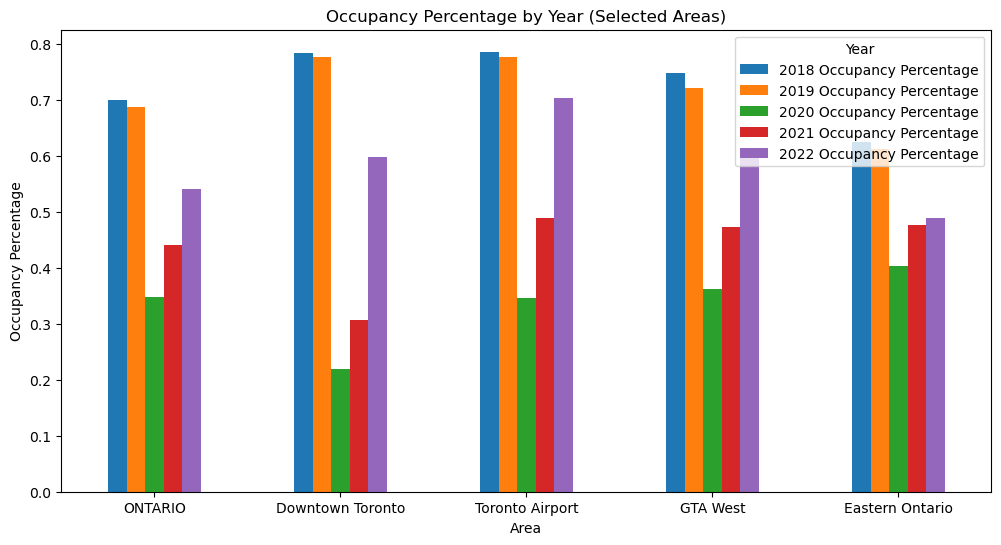

In [15]:
# Convert the columns to numeric (in case they are not already numeric)
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with 0 (you can choose a different fill value if needed)
filtered_df.fillna(0, inplace=True)

# Create bar plots for each year using the filtered DataFrame
ax = filtered_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Occupancy Percentage by Year (Selected Areas)')
plt.xlabel('Area')
plt.ylabel('Occupancy Percentage')
plt.legend(title='Year')

import os
# Specify the output directory
output_directory = 'output'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define the filename for the saved image
output_filename = os.path.join(output_directory, 'Occupancy_Percentage_by_Year.png')

# Save the bar plot as an image
plt.savefig(output_filename)

plt.show()

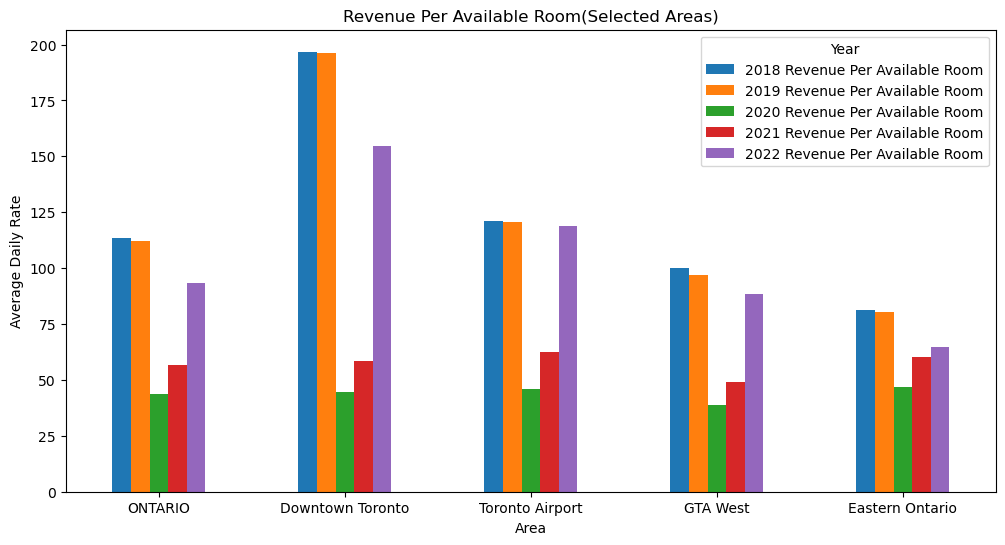

In [16]:
# Convert the columns to numeric (in case they are not already numeric)
filtered_df3 = filtered_df3.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with 0 (you can choose a different fill value if needed)
filtered_df3.fillna(0, inplace=True)

# Create bar plots for each year using the filtered DataFrame
ax = filtered_df3.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Revenue Per Available Room(Selected Areas)')
plt.xlabel('Area')
plt.ylabel('Average Daily Rate')
plt.legend(title='Year')

import os
# Specify the output directory
output_directory = 'output'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define the filename for the saved image
output_filename = os.path.join(output_directory, 'Revenue_Per_Available_Room_Year.png')

# Save the bar plot as an image
plt.savefig(output_filename)

plt.show()

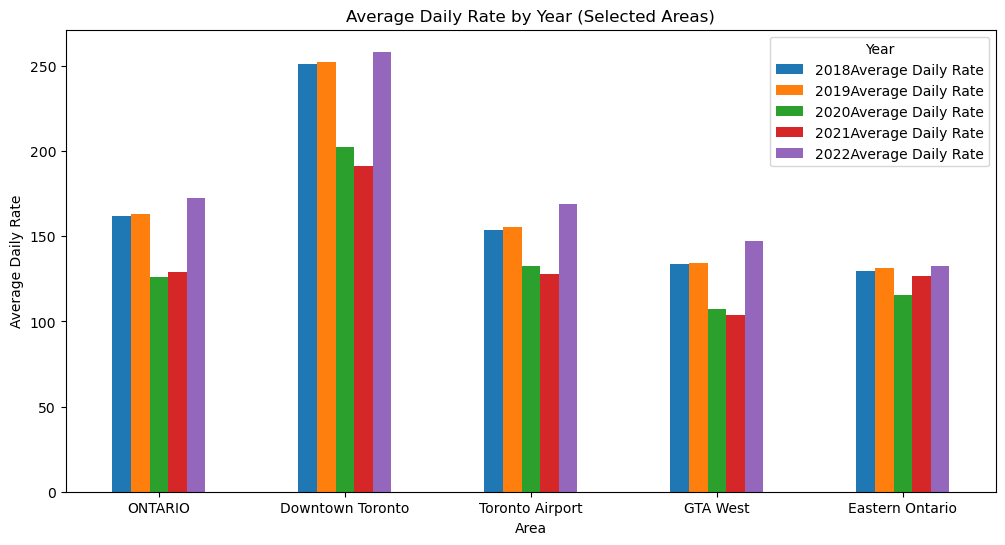

In [17]:
# Convert the columns to numeric (in case they are not already numeric)
filtered_df2 = filtered_df2.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with 0 (you can choose a different fill value if needed)
filtered_df2.fillna(0, inplace=True)

# Create bar plots for each year using the filtered DataFrame
ax = filtered_df2.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title('Average Daily Rate by Year (Selected Areas)')
plt.xlabel('Area')
plt.ylabel('Average Daily Rate')
plt.legend(title='Year')

import os
# Specify the output directory
output_directory = 'output'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Define the filename for the saved image
output_filename = os.path.join(output_directory, 'Average_Daily_Rate_by_Year.png')

# Save the bar plot as an image
plt.savefig(output_filename)

plt.show()